In [1]:
import pandas as pd

In [2]:
pd.__version__

'1.1.5'

In [3]:
import matplotlib.pyplot as plt

In [4]:
# Adjust plot size
#options(repr.plot.width=16, repr.plot.height=6)

# For some reason, if this is in the same cell as the import command, it doesn't work.
plt.rcParams["figure.figsize"] = [18.0,8.0]

# Read Count Matrix

In [5]:
cm=pd.read_csv("count_matrix.csv")
cm.rename(columns={"subject": "sample"},inplace=True)

In [6]:
cm['subject']=cm['sample'].astype(str).str[0:7]

In [7]:
cm.shape

(274, 59)

In [8]:
cm.head()

,sample,raw pair count,HERVK113 unpaired reads aligned,HERVK113 unpaired human Q00 aligned,HERVK113 unpaired human Q10 aligned,HERVK113 unpaired human Q20 aligned,HERVK113 paired reads aligned,HERVK113 paired human Q00 aligned,HERVK113 paired human Q10 aligned,HERVK113 paired human Q20 aligned,...,SVA_E paired human Q20 aligned,SVA_F unpaired reads aligned,SVA_F unpaired human Q00 aligned,SVA_F unpaired human Q10 aligned,SVA_F unpaired human Q20 aligned,SVA_F paired reads aligned,SVA_F paired human Q00 aligned,SVA_F paired human Q10 aligned,SVA_F paired human Q20 aligned,subject
0,02-2483-01A,566024474,5217,5099,2910,2894,3558,1493,1345,1328,...,4581,12823,11788,4762,4719,8134,2632,2216,2170,02-2483
1,02-2483-10A,579304076,4735,4646,2687,2673,3338,1474,1333,1308,...,4016,10290,9529,3830,3791,6732,2296,1910,1878,02-2483
2,02-2485-01A,575060540,5140,5047,2904,2892,3782,1671,1547,1523,...,4690,11766,10748,4482,4433,8146,2701,2262,2217,02-2485
3,02-2485-10A,478851061,3895,3849,2229,2221,2564,1162,1073,1061,...,3959,8731,8061,3293,3252,6392,2246,1893,1860,02-2485
4,06-0125-01A,1066268796,8464,8384,4874,4853,5920,2720,2538,2514,...,10953,24154,22406,9480,9421,17454,6553,5567,5507,06-0125


In [9]:
cm[['subject','sample']].head()

,subject,sample
0,02-2483,02-2483-01A
1,02-2483,02-2483-10A
2,02-2485,02-2485-01A
3,02-2485,02-2485-10A
4,06-0125,06-0125-01A


# Read Metadata

In [10]:
mt=pd.read_csv("metadata.cart.TCGA.GBM-LGG.WGS.bam.2020-07-17.csv",header=None,
 names=['submitter','days_to_death','gender','disease_type','center_name'])

In [11]:
mt.shape

(127, 5)

In [12]:
mt.head()

,submitter,days_to_death,gender,disease_type,center_name
0,02-2483,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard
1,02-2485,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard
2,06-0125,1448.0,female,Glioblastoma Multiforme,Broad Institute of MIT and Harvard
3,06-0152,375.0,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard
4,06-0157,97.0,female,Glioblastoma Multiforme,Broad Institute of MIT and Harvard


# Merge

In [13]:
merged=cm.merge(mt,left_on='subject',right_on='submitter',suffixes=["_cm","_mt"],how='outer')

In [14]:
merged.head()

,sample,raw pair count,HERVK113 unpaired reads aligned,HERVK113 unpaired human Q00 aligned,HERVK113 unpaired human Q10 aligned,HERVK113 unpaired human Q20 aligned,HERVK113 paired reads aligned,HERVK113 paired human Q00 aligned,HERVK113 paired human Q10 aligned,HERVK113 paired human Q20 aligned,...,SVA_F paired reads aligned,SVA_F paired human Q00 aligned,SVA_F paired human Q10 aligned,SVA_F paired human Q20 aligned,subject,submitter,days_to_death,gender,disease_type,center_name
0,02-2483-01A,566024474,5217,5099,2910,2894,3558,1493,1345,1328,...,8134,2632,2216,2170,02-2483,02-2483,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard
1,02-2483-10A,579304076,4735,4646,2687,2673,3338,1474,1333,1308,...,6732,2296,1910,1878,02-2483,02-2483,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard
2,02-2485-01A,575060540,5140,5047,2904,2892,3782,1671,1547,1523,...,8146,2701,2262,2217,02-2485,02-2485,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard
3,02-2485-10A,478851061,3895,3849,2229,2221,2564,1162,1073,1061,...,6392,2246,1893,1860,02-2485,02-2485,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard
4,06-0125-01A,1066268796,8464,8384,4874,4853,5920,2720,2538,2514,...,17454,6553,5567,5507,06-0125,06-0125,1448.0,female,Glioblastoma Multiforme,Broad Institute of MIT and Harvard


In [15]:
merged.shape

(279, 64)

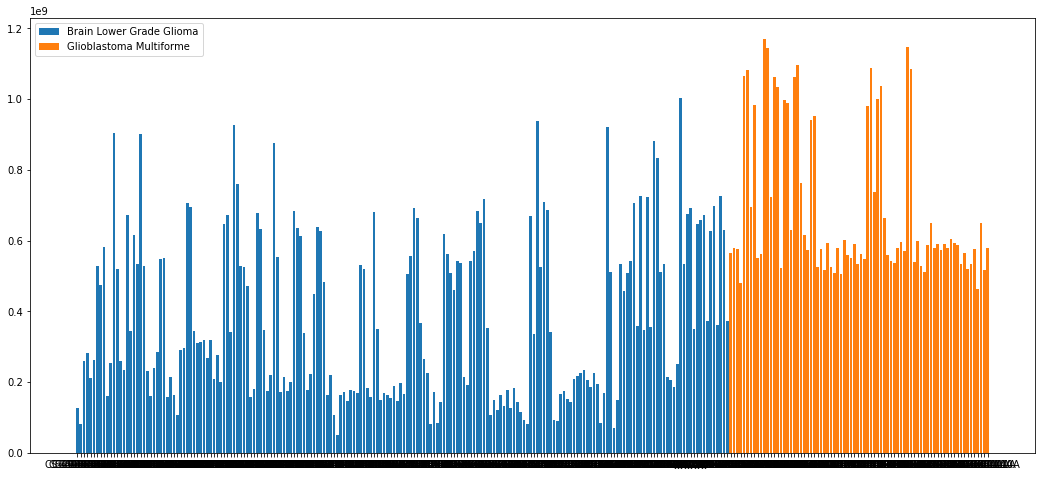

In [16]:
groups = merged.groupby('disease_type')
fig, ax = plt.subplots()
for name, group in groups:
    ax.bar(group['sample'],group['raw pair count'], label=name)
ax.legend()

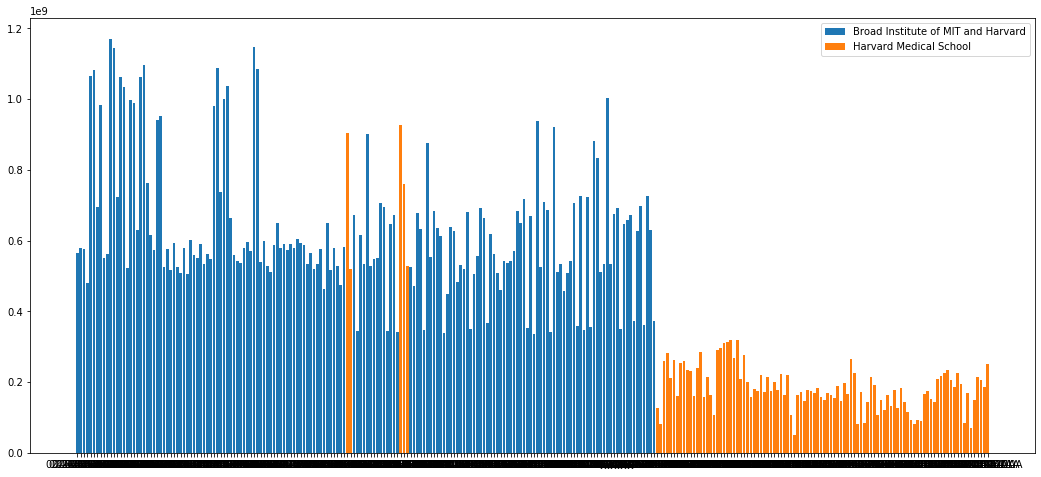

In [17]:
groups = merged.groupby('center_name')
fig, ax = plt.subplots()
for name, group in groups:
    ax.bar(group['sample'],group['raw pair count'], label=name)
ax.legend()

# Select ONLY those from Broad (Harvard Medical School's are too low)

In [18]:
df=merged[merged['center_name'] == 'Broad Institute of MIT and Harvard'].copy()

In [19]:
df.shape

(174, 64)

# Drop Recurrent Tumor Rows

In [20]:
df.drop(df[df['sample'].str.contains("-02.$")].index,inplace=True)

In [21]:
df.shape

(147, 64)

In [22]:
df['normalized HERVK113 paired human Q20 aligned']=df['HERVK113 paired human Q20 aligned']/df['raw pair count']

In [23]:
df['normalized SVA_A paired human Q20 aligned']=df['SVA_A paired human Q20 aligned']/df['raw pair count']

In [24]:
df['normalized SVA_B paired human Q20 aligned']=df['SVA_B paired human Q20 aligned']/df['raw pair count']

In [25]:
df['normalized SVA_C paired human Q20 aligned']=df['SVA_C paired human Q20 aligned']/df['raw pair count']

In [26]:
df['normalized SVA_D paired human Q20 aligned']=df['SVA_D paired human Q20 aligned']/df['raw pair count']

In [27]:
df['normalized SVA_E paired human Q20 aligned']=df['SVA_E paired human Q20 aligned']/df['raw pair count']

In [28]:
df['normalized SVA_F paired human Q20 aligned']=df['SVA_F paired human Q20 aligned']/df['raw pair count']

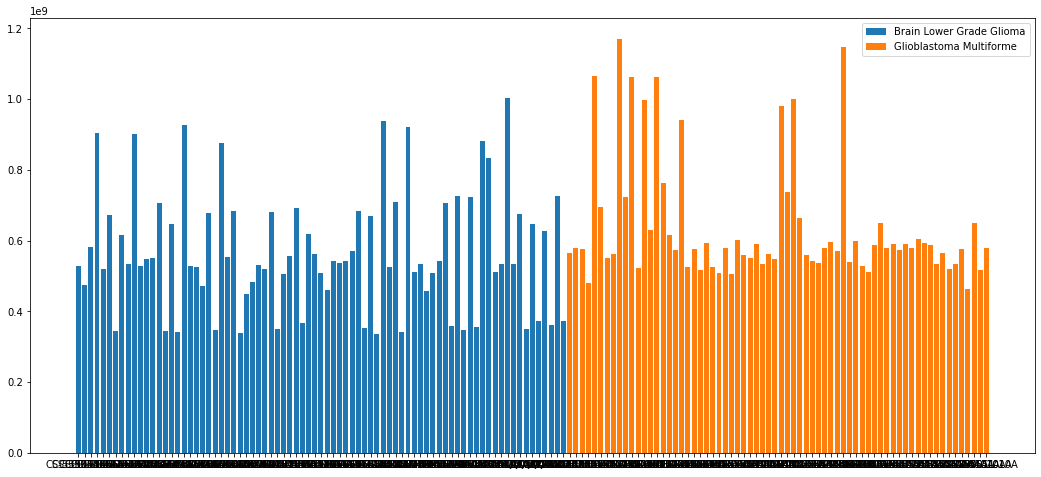

In [29]:
groups = df.groupby('disease_type')
fig, ax = plt.subplots()
for name, group in groups:
    ax.bar(group['sample'],group['raw pair count'], label=name)
ax.legend()

In [30]:
tumor=df[df['sample'].str.contains("-01.$")].copy()

In [31]:
tumor.shape

(73, 71)

In [32]:
tumor.head()

,sample,raw pair count,HERVK113 unpaired reads aligned,HERVK113 unpaired human Q00 aligned,HERVK113 unpaired human Q10 aligned,HERVK113 unpaired human Q20 aligned,HERVK113 paired reads aligned,HERVK113 paired human Q00 aligned,HERVK113 paired human Q10 aligned,HERVK113 paired human Q20 aligned,...,gender,disease_type,center_name,normalized HERVK113 paired human Q20 aligned,normalized SVA_A paired human Q20 aligned,normalized SVA_B paired human Q20 aligned,normalized SVA_C paired human Q20 aligned,normalized SVA_D paired human Q20 aligned,normalized SVA_E paired human Q20 aligned,normalized SVA_F paired human Q20 aligned
0,02-2483-01A,566024474,5217,5099,2910,2894,3558,1493,1345,1328,...,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,0.000002,0.000009,0.000008,0.000008,0.000008,0.000008,0.000004
2,02-2485-01A,575060540,5140,5047,2904,2892,3782,1671,1547,1523,...,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,0.000003,0.000009,0.000008,0.000008,0.000008,0.000008,0.000004
4,06-0125-01A,1066268796,8464,8384,4874,4853,5920,2720,2538,2514,...,female,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,0.000002,0.000011,0.000010,0.000010,0.000010,0.000010,0.000005
8,06-0157-01A,551037711,5322,5247,3005,2996,3280,1465,1361,1338,...,female,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,0.000002,0.000011,0.000010,0.000010,0.000010,0.000010,0.000005
10,06-0171-01A,1170585350,9069,8940,5227,5190,6420,2949,2719,2672,...,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,0.000002,0.000011,0.000010,0.000010,0.000010,0.000010,0.000005


In [33]:
normal=df[df['sample'].str.contains("-10.$")].copy()

In [34]:
normal.shape

(74, 71)

In [35]:
normal.head()

,sample,raw pair count,HERVK113 unpaired reads aligned,HERVK113 unpaired human Q00 aligned,HERVK113 unpaired human Q10 aligned,HERVK113 unpaired human Q20 aligned,HERVK113 paired reads aligned,HERVK113 paired human Q00 aligned,HERVK113 paired human Q10 aligned,HERVK113 paired human Q20 aligned,...,gender,disease_type,center_name,normalized HERVK113 paired human Q20 aligned,normalized SVA_A paired human Q20 aligned,normalized SVA_B paired human Q20 aligned,normalized SVA_C paired human Q20 aligned,normalized SVA_D paired human Q20 aligned,normalized SVA_E paired human Q20 aligned,normalized SVA_F paired human Q20 aligned
1,02-2483-10A,579304076,4735,4646,2687,2673,3338,1474,1333,1308,...,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,0.000002,0.000008,0.000007,0.000007,0.000007,0.000007,0.000003
3,02-2485-10A,478851061,3895,3849,2229,2221,2564,1162,1073,1061,...,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,0.000002,0.000009,0.000008,0.000008,0.000008,0.000008,0.000004
6,06-0125-10A,695377506,5184,5103,2905,2892,3778,1643,1520,1494,...,female,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,0.000002,0.000009,0.000008,0.000008,0.000008,0.000008,0.000004
9,06-0157-10A,561676819,4434,4345,2471,2458,3040,1303,1195,1179,...,female,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,0.000002,0.000009,0.000008,0.000008,0.000008,0.000008,0.000004
12,06-0171-10A,721570484,5428,5302,3065,3048,3472,1440,1322,1306,...,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,0.000002,0.000008,0.000007,0.000007,0.000007,0.000007,0.000003




# Raw counts


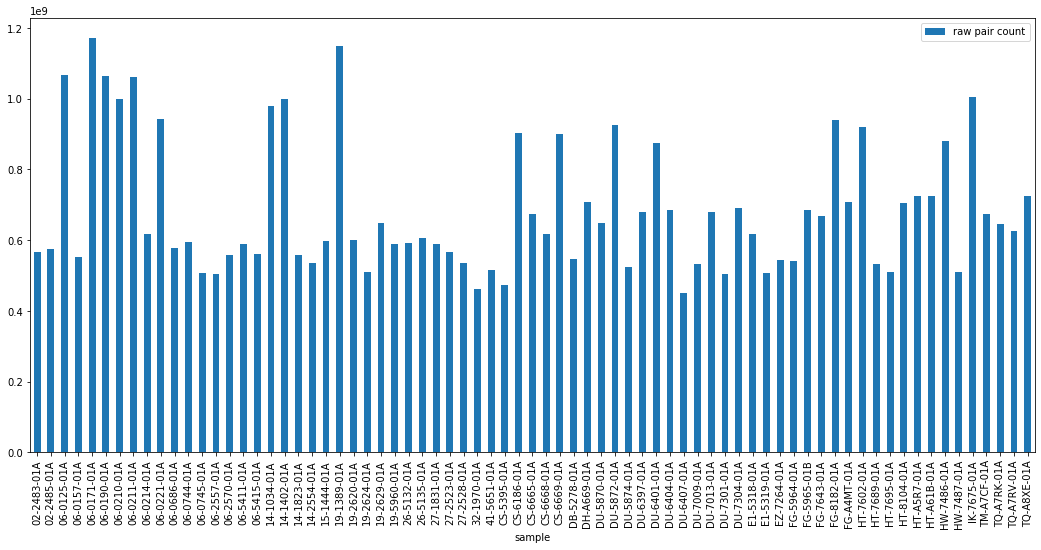

In [36]:
tumor.plot(x='sample',y='raw pair count',kind='bar')

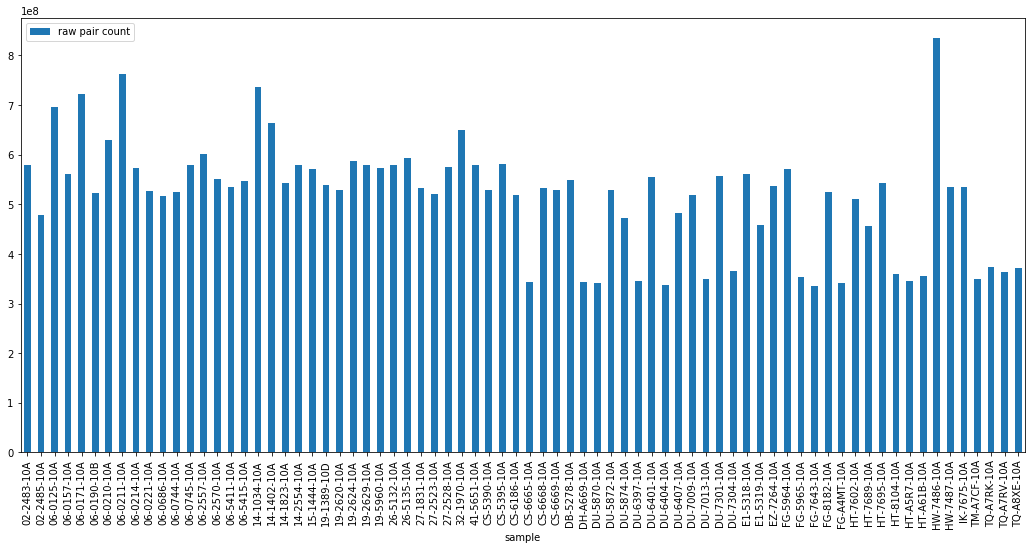

In [37]:
normal.plot(x='sample',y='raw pair count',kind='bar')

In [38]:
normal['subject']

1      02-2483
3      02-2485
6      06-0125
9      06-0157
12     06-0171
        ...   
265    IK-7675
268    TM-A7CF
272    TQ-A7RK
275    TQ-A7RV
278    TQ-A8XE
Name: subject, Length: 74, dtype: object

In [39]:
tumor['subject']

0      02-2483
2      02-2485
4      06-0125
8      06-0157
10     06-0171
        ...   
264    IK-7675
266    TM-A7CF
269    TQ-A7RK
273    TQ-A7RV
276    TQ-A8XE
Name: subject, Length: 73, dtype: object

# Tumor Normal comparison

In [40]:
#tn=normal.join(tumor,on='subject',lsuffix="_normal",rsuffix="_tumor",how='outer')
tn=normal.merge(tumor,on='subject',suffixes=["_normal","_tumor"],how='outer')

In [41]:
tn.shape

(74, 141)

# Select ONLY those with matching tumor and normal raw pair counts

In [42]:
tn=tn[(tn['raw pair count_normal']>0) & (tn['raw pair count_tumor']>0)]

In [43]:
tn.shape

(73, 141)

In [44]:
tn.head()

,sample_normal,raw pair count_normal,HERVK113 unpaired reads aligned_normal,HERVK113 unpaired human Q00 aligned_normal,HERVK113 unpaired human Q10 aligned_normal,HERVK113 unpaired human Q20 aligned_normal,HERVK113 paired reads aligned_normal,HERVK113 paired human Q00 aligned_normal,HERVK113 paired human Q10 aligned_normal,HERVK113 paired human Q20 aligned_normal,...,gender_tumor,disease_type_tumor,center_name_tumor,normalized HERVK113 paired human Q20 aligned_tumor,normalized SVA_A paired human Q20 aligned_tumor,normalized SVA_B paired human Q20 aligned_tumor,normalized SVA_C paired human Q20 aligned_tumor,normalized SVA_D paired human Q20 aligned_tumor,normalized SVA_E paired human Q20 aligned_tumor,normalized SVA_F paired human Q20 aligned_tumor
0,02-2483-10A,579304076,4735,4646,2687,2673,3338,1474,1333,1308,...,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,0.000002,0.000009,0.000008,0.000008,0.000008,0.000008,0.000004
1,02-2485-10A,478851061,3895,3849,2229,2221,2564,1162,1073,1061,...,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,0.000003,0.000009,0.000008,0.000008,0.000008,0.000008,0.000004
2,06-0125-10A,695377506,5184,5103,2905,2892,3778,1643,1520,1494,...,female,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,0.000002,0.000011,0.000010,0.000010,0.000010,0.000010,0.000005
3,06-0157-10A,561676819,4434,4345,2471,2458,3040,1303,1195,1179,...,female,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,0.000002,0.000011,0.000010,0.000010,0.000010,0.000010,0.000005
4,06-0171-10A,721570484,5428,5302,3065,3048,3472,1440,1322,1306,...,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,0.000002,0.000011,0.000010,0.000010,0.000010,0.000010,0.000005


In [45]:
tn[['subject','sample_normal','raw pair count_normal','sample_tumor','raw pair count_tumor']].head()

,subject,sample_normal,raw pair count_normal,sample_tumor,raw pair count_tumor
0,02-2483,02-2483-10A,579304076,02-2483-01A,5.660245e+08
1,02-2485,02-2485-10A,478851061,02-2485-01A,5.750605e+08
2,06-0125,06-0125-10A,695377506,06-0125-01A,1.066269e+09
3,06-0157,06-0157-10A,561676819,06-0157-01A,5.510377e+08
4,06-0171,06-0171-10A,721570484,06-0171-01A,1.170585e+09


In [46]:
plt.rcParams["figure.figsize"] = [18.0,15.0]

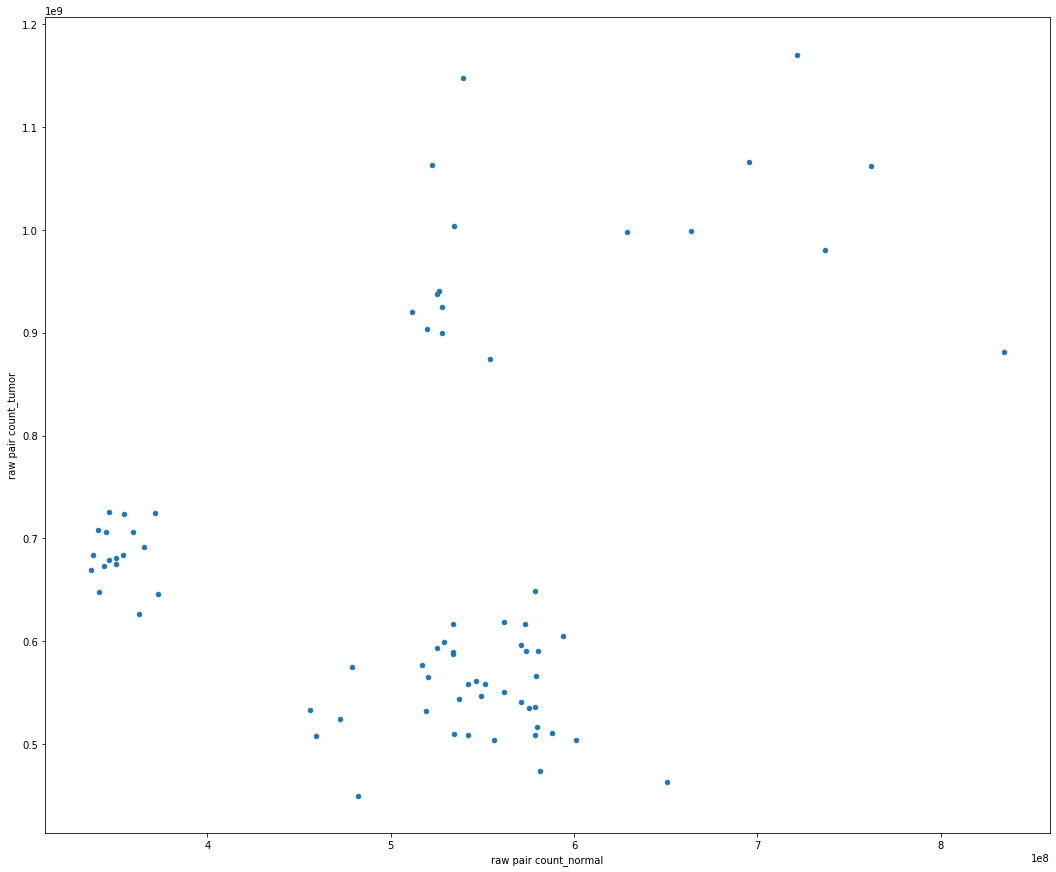

In [47]:
# days_to_death	gender	disease_type	center_name
tn.plot(x='raw pair count_normal',y='raw pair count_tumor',kind='scatter')

/Users/jakewendt/Library/Python/3.6/lib/python/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/jakewendt/Library/Python/3.6/lib/python/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/jakewendt/Library/Python/3.6/lib/python/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


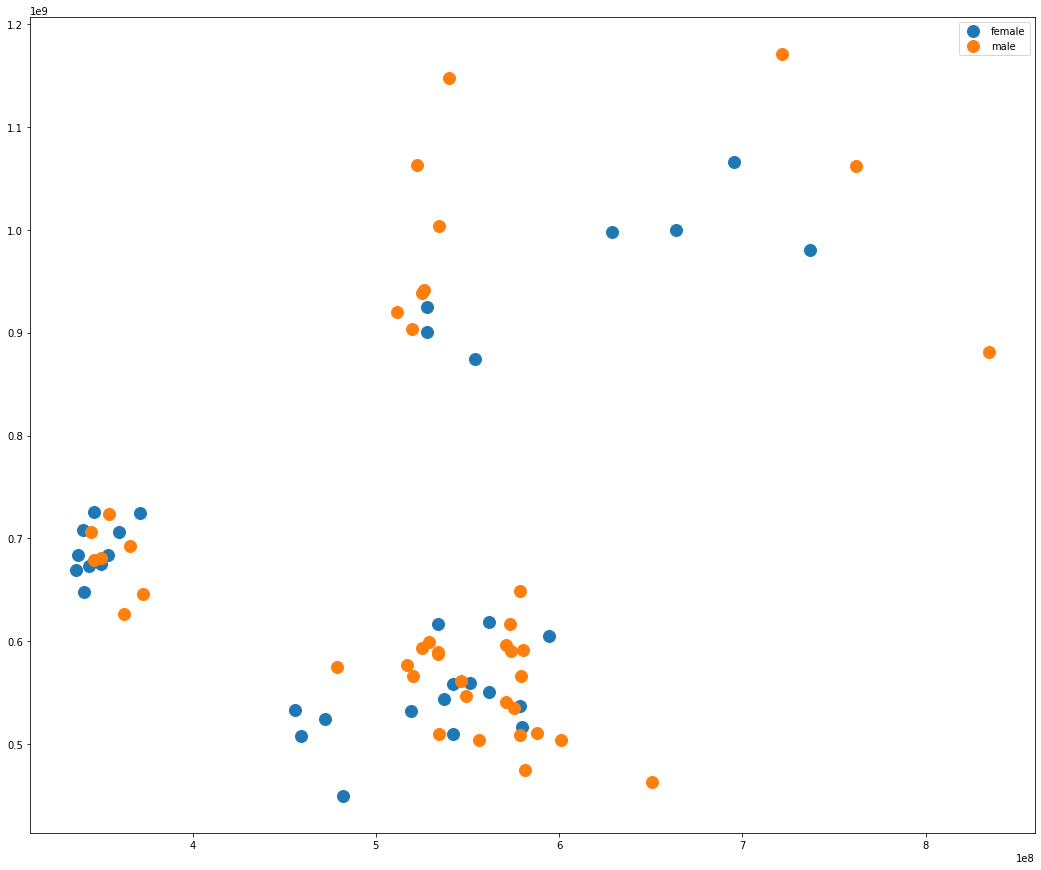

In [48]:
groups = tn.groupby('gender_normal')
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group['raw pair count_normal'],group['raw pair count_tumor'],
        marker='o', linestyle='', ms=12, label=name)
ax.legend()

/Users/jakewendt/Library/Python/3.6/lib/python/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/jakewendt/Library/Python/3.6/lib/python/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/jakewendt/Library/Python/3.6/lib/python/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


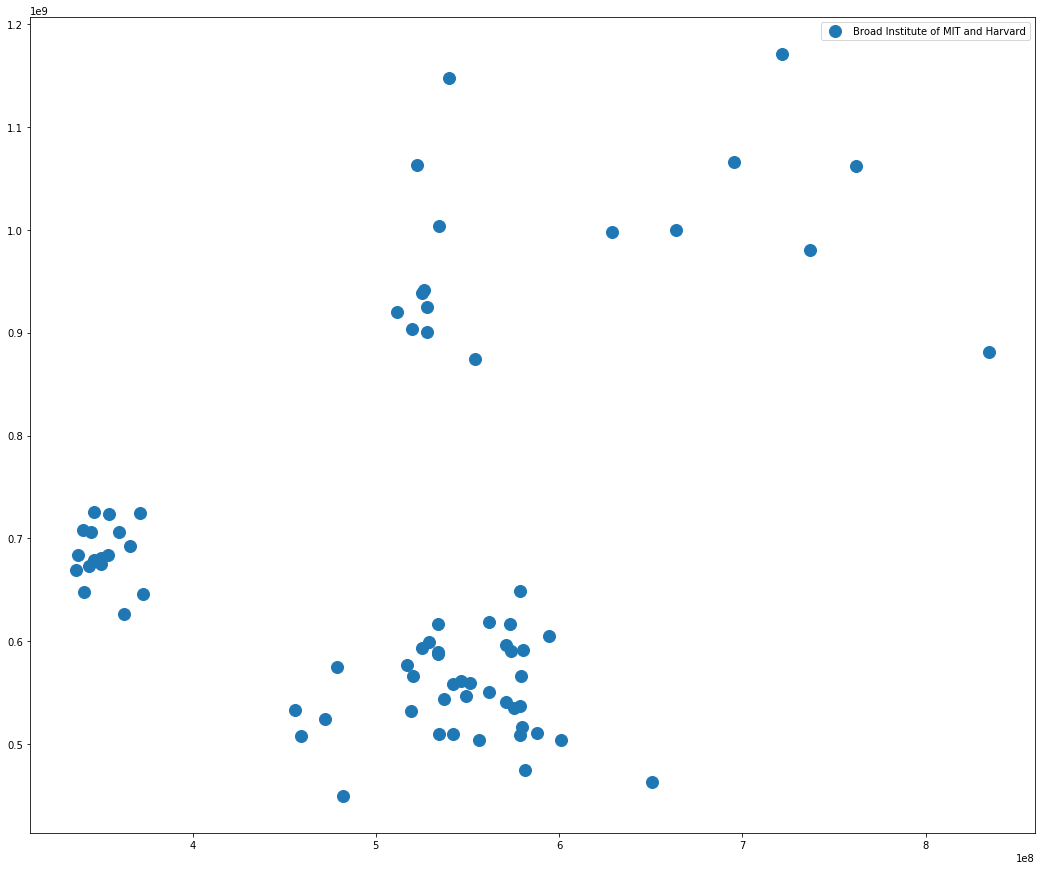

In [49]:
groups = tn.groupby('center_name_normal')
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group['raw pair count_normal'],group['raw pair count_tumor'],
        marker='o', linestyle='', ms=12, label=name)
ax.legend()

/Users/jakewendt/Library/Python/3.6/lib/python/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/jakewendt/Library/Python/3.6/lib/python/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/jakewendt/Library/Python/3.6/lib/python/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


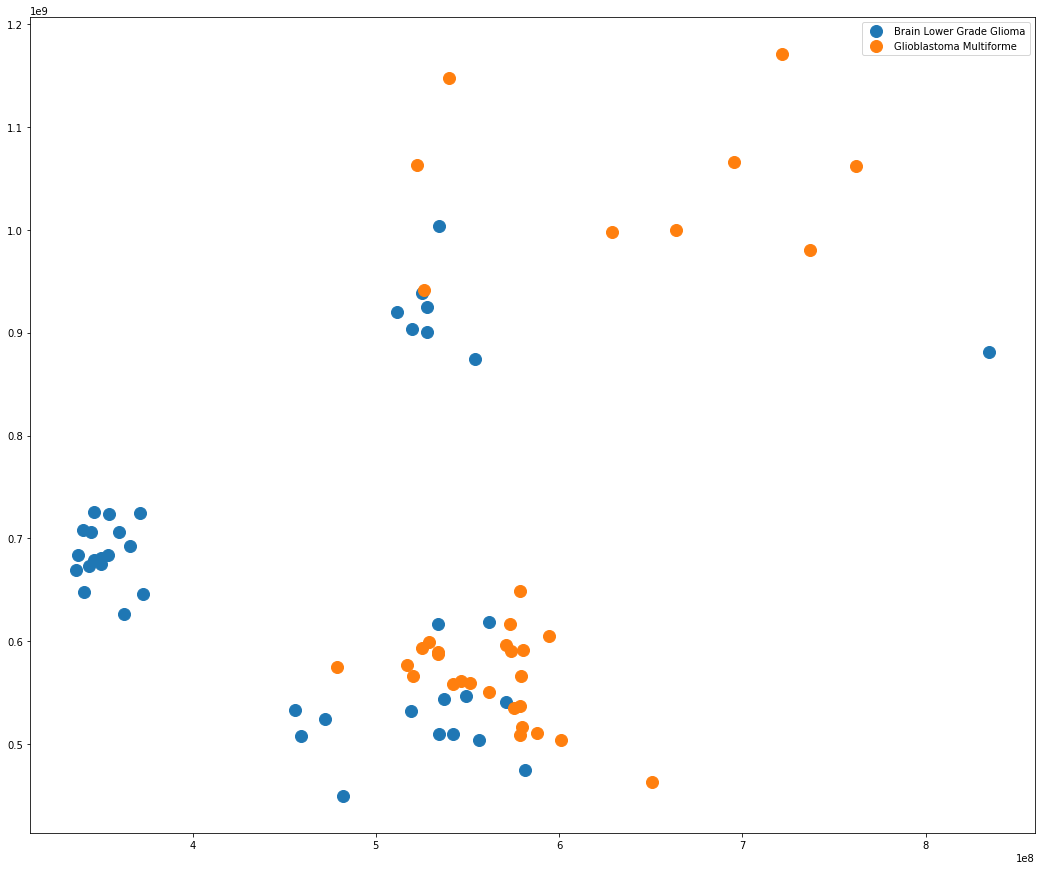

In [50]:
groups = tn.groupby('disease_type_normal')
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group['raw pair count_normal'],group['raw pair count_tumor'],
        marker='o', linestyle='', ms=12, label=name)
ax.legend()

In [51]:
plt.rcParams["figure.figsize"] = [18.0,8.0]

In [52]:
tn['raw count ratio']=tn['raw pair count_tumor']/tn['raw pair count_normal']

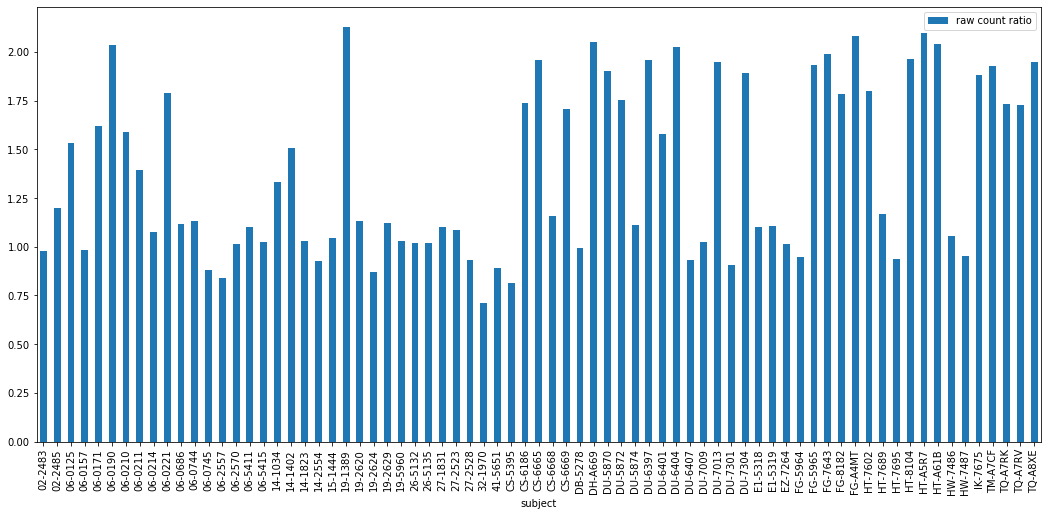

In [53]:
tn.plot(x='subject',y='raw count ratio',kind='bar')

No tumor data?

In [54]:
df[df['subject']=='CS-5390']

,sample,raw pair count,HERVK113 unpaired reads aligned,HERVK113 unpaired human Q00 aligned,HERVK113 unpaired human Q10 aligned,HERVK113 unpaired human Q20 aligned,HERVK113 paired reads aligned,HERVK113 paired human Q00 aligned,HERVK113 paired human Q10 aligned,HERVK113 paired human Q20 aligned,...,gender,disease_type,center_name,normalized HERVK113 paired human Q20 aligned,normalized SVA_A paired human Q20 aligned,normalized SVA_B paired human Q20 aligned,normalized SVA_C paired human Q20 aligned,normalized SVA_D paired human Q20 aligned,normalized SVA_E paired human Q20 aligned,normalized SVA_F paired human Q20 aligned
84,CS-5390-10A,529225224,4273,4213,2422,2419,2814,1269,1180,1161,...,female,Brain Lower Grade Glioma,Broad Institute of MIT and Harvard,0.000002,0.000006,0.000006,0.000005,0.000005,0.000005,0.000002


# Below are plots of total HERV insertion counts

In [55]:
plt.rcParams["figure.figsize"] = [18.0,8.0]

# Tumor counts

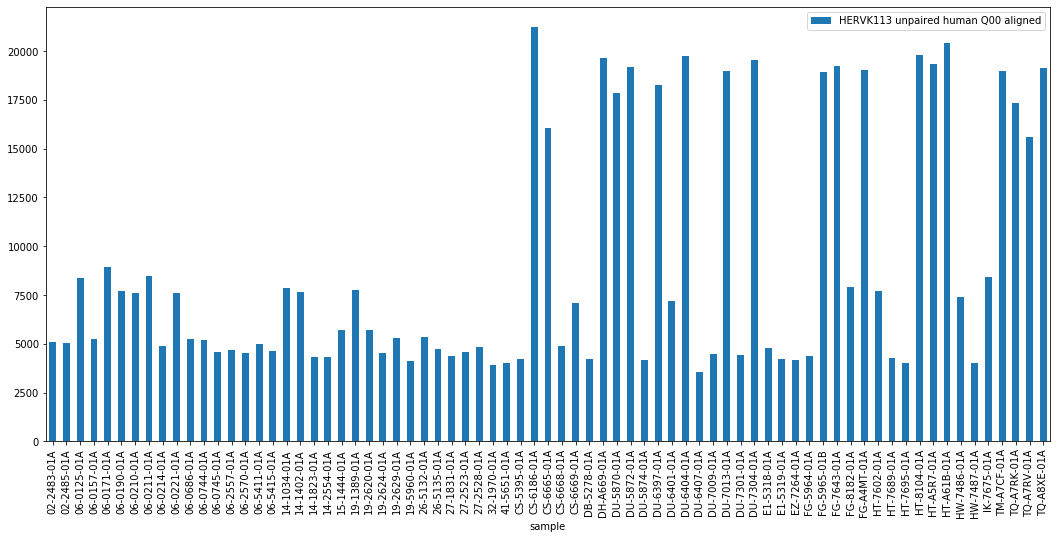

In [56]:
tumor.plot(x='sample',y='HERVK113 unpaired human Q00 aligned',kind='bar')

In [57]:
#tumor.plot(x='sample',y='normalized HERVK113 paired human Q00 aligned',kind='bar')

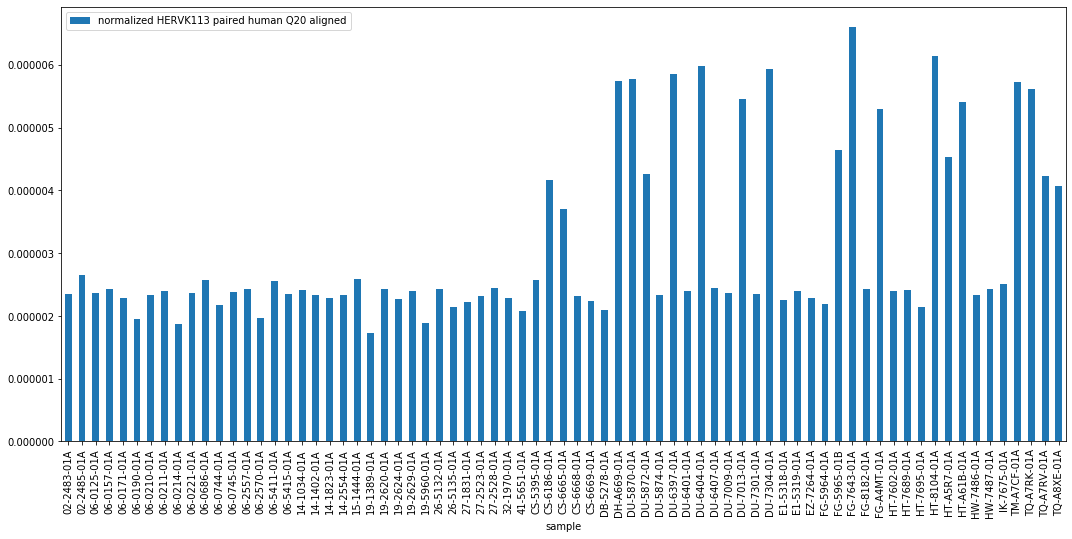

In [58]:
tumor.plot(x='sample',y='normalized HERVK113 paired human Q20 aligned',kind='bar')

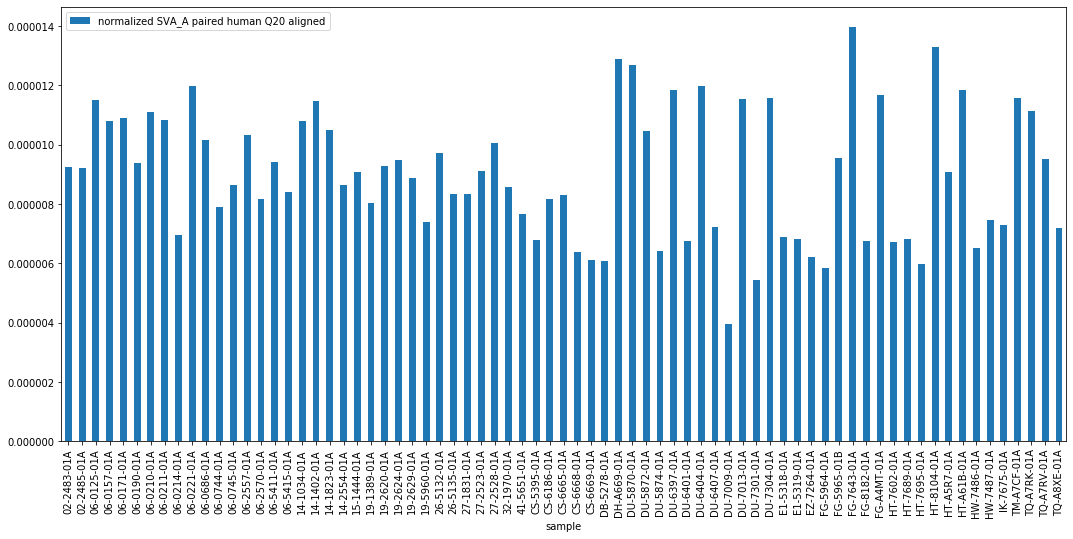

In [59]:
tumor.plot(x='sample',y='normalized SVA_A paired human Q20 aligned',kind='bar')

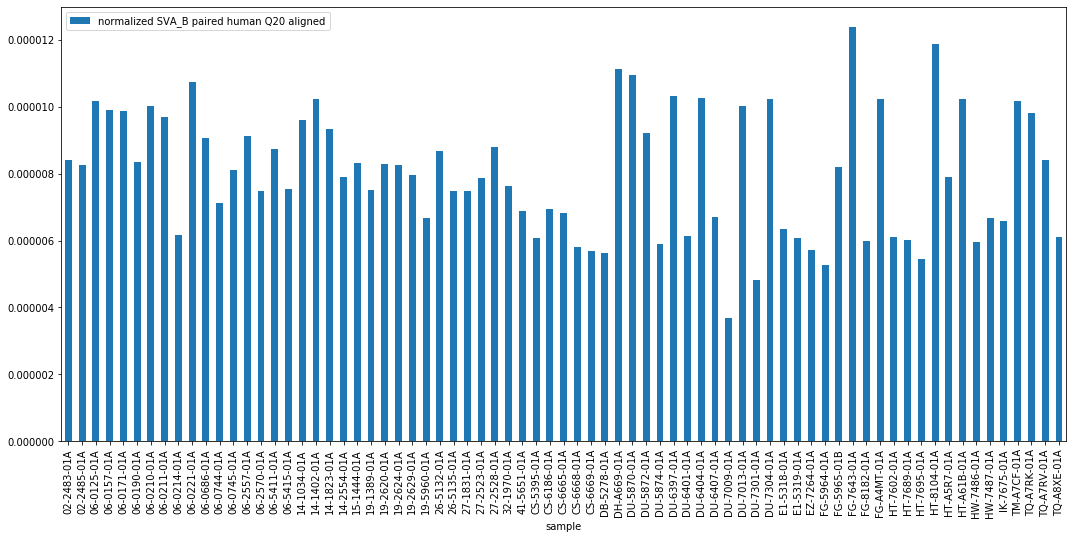

In [60]:
tumor.plot(x='sample',y='normalized SVA_B paired human Q20 aligned',kind='bar')

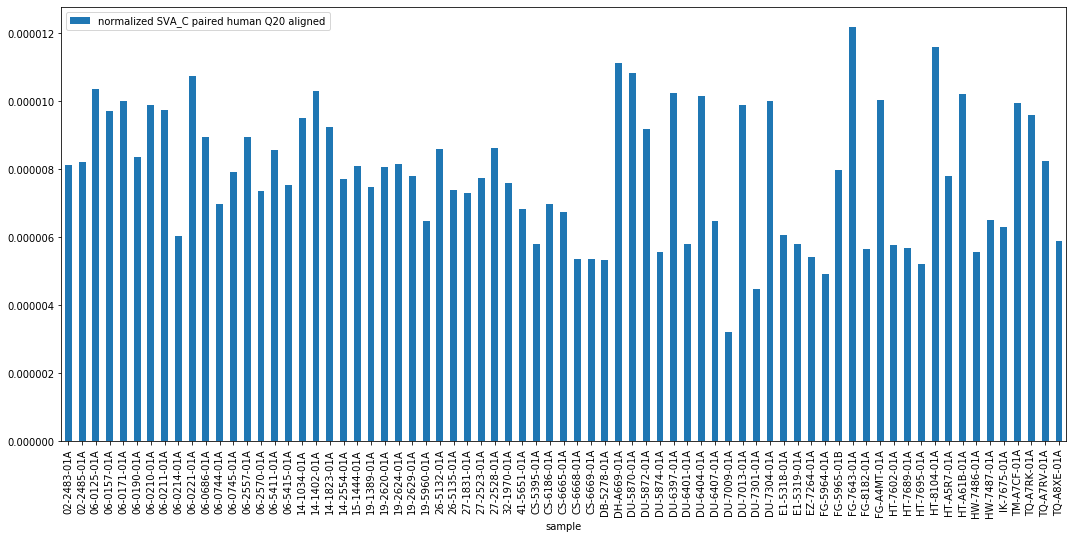

In [61]:
tumor.plot(x='sample',y='normalized SVA_C paired human Q20 aligned',kind='bar')

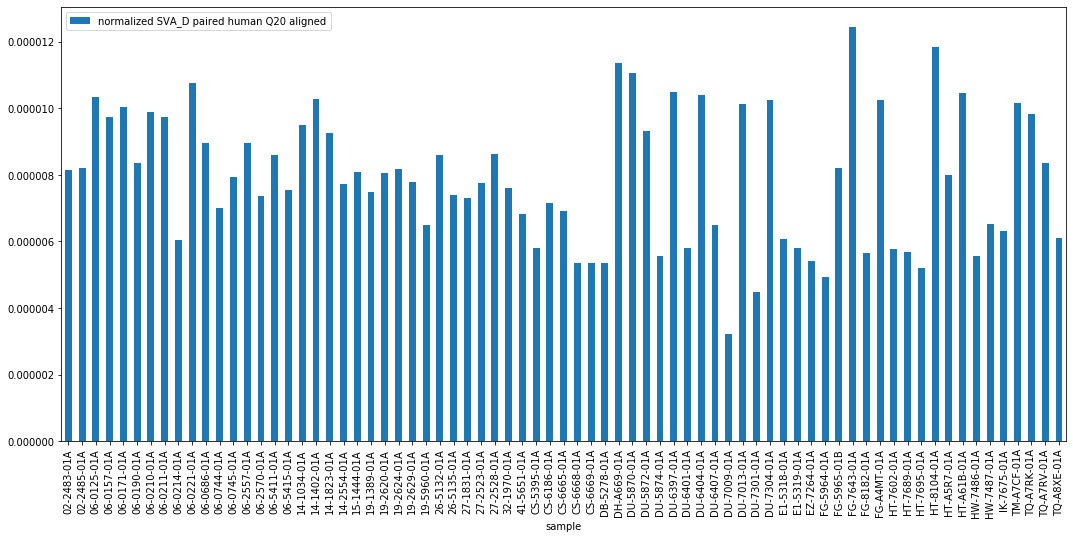

In [62]:
tumor.plot(x='sample',y='normalized SVA_D paired human Q20 aligned',kind='bar')

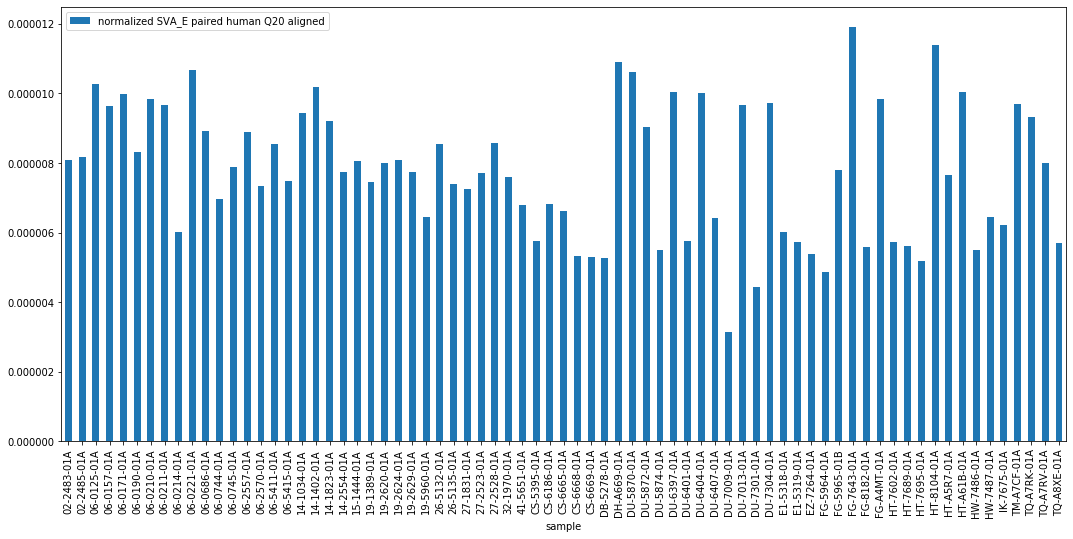

In [63]:
tumor.plot(x='sample',y='normalized SVA_E paired human Q20 aligned',kind='bar')

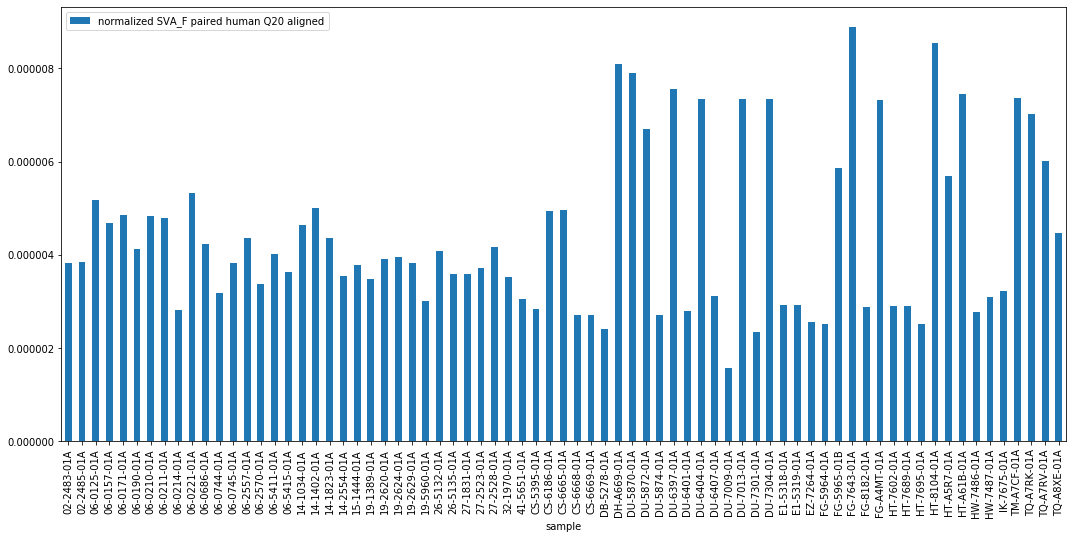

In [64]:
tumor.plot(x='sample',y='normalized SVA_F paired human Q20 aligned',kind='bar')

# Normal HERV counts

In [65]:
#normal.plot(x='sample',y='normalized HERVK113 paired human Q00 aligned',kind='bar')

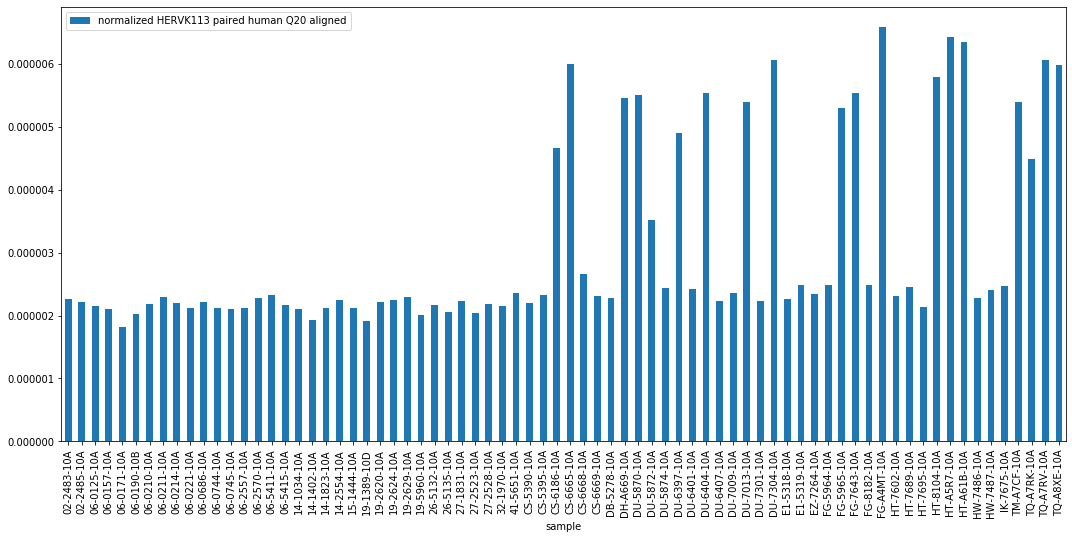

In [66]:
normal.plot(x='sample',y='normalized HERVK113 paired human Q20 aligned',kind='bar')

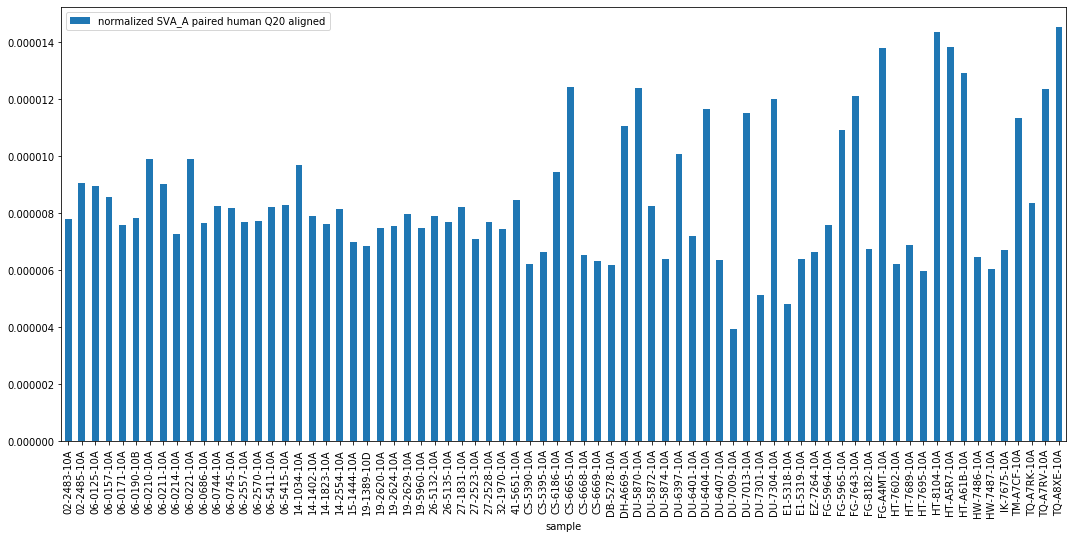

In [67]:
normal.plot(x='sample',y='normalized SVA_A paired human Q20 aligned',kind='bar')

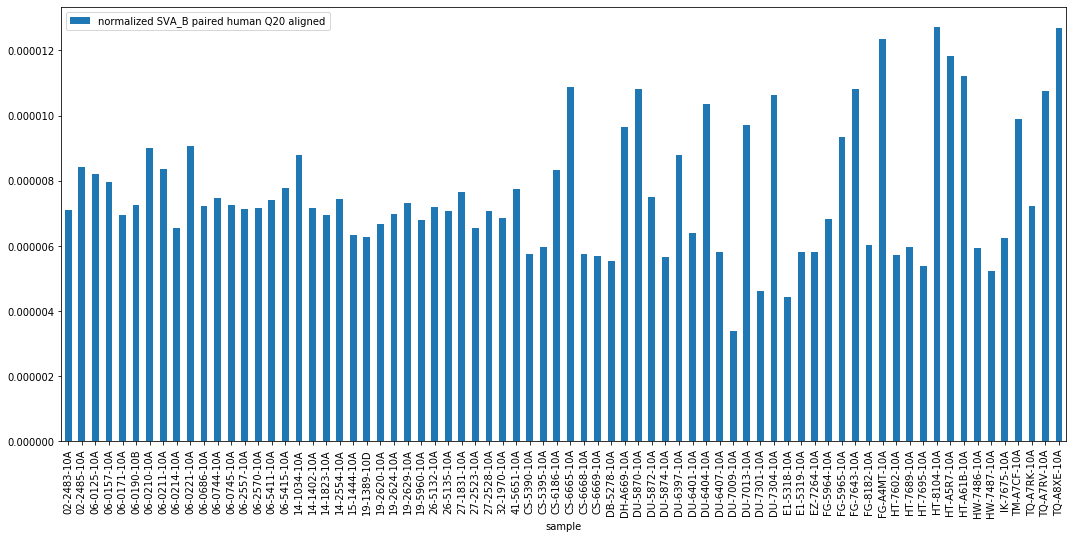

In [68]:
normal.plot(x='sample',y='normalized SVA_B paired human Q20 aligned',kind='bar')

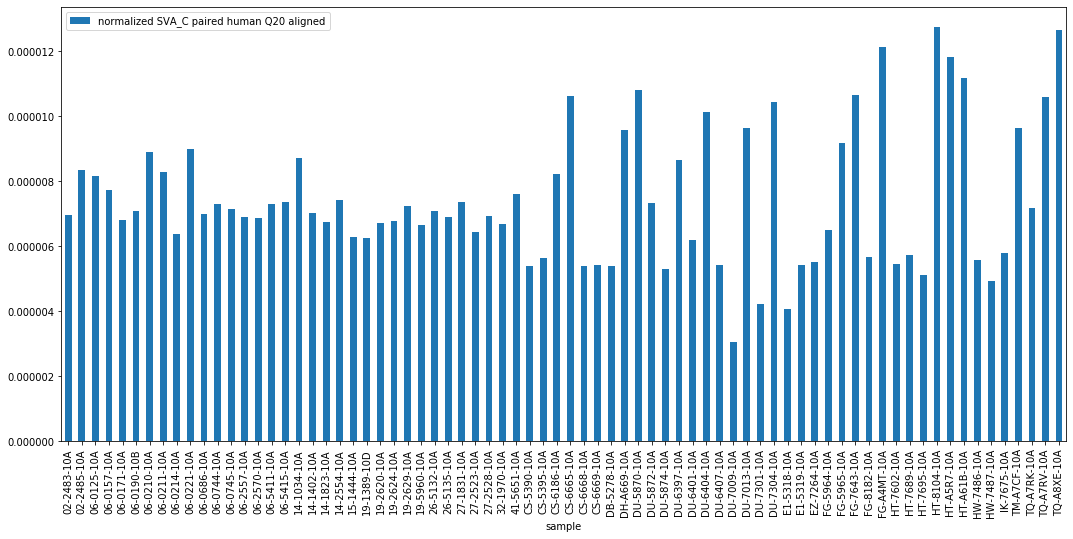

In [69]:
normal.plot(x='sample',y='normalized SVA_C paired human Q20 aligned',kind='bar')

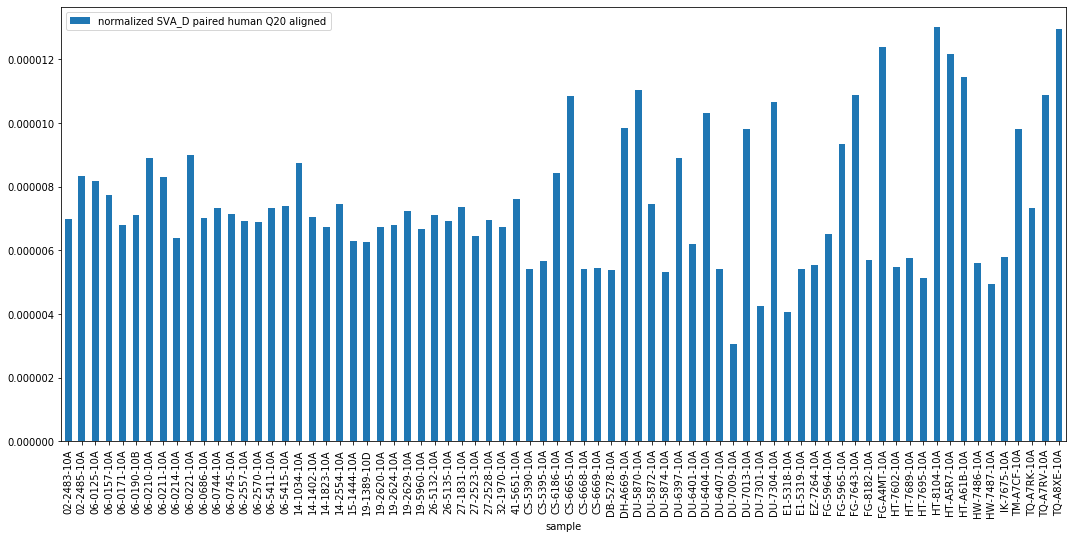

In [70]:
normal.plot(x='sample',y='normalized SVA_D paired human Q20 aligned',kind='bar')

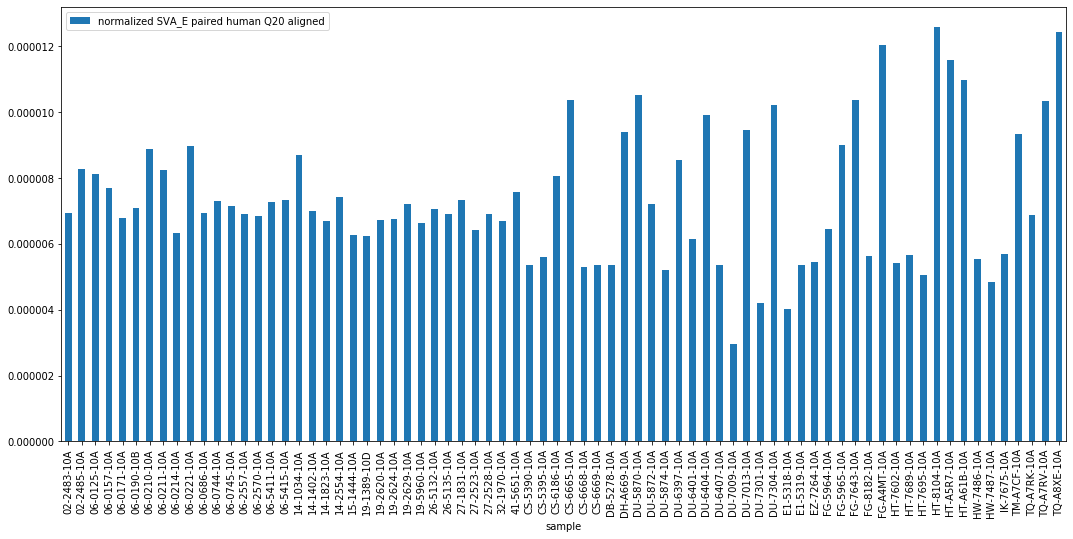

In [71]:
normal.plot(x='sample',y='normalized SVA_E paired human Q20 aligned',kind='bar')

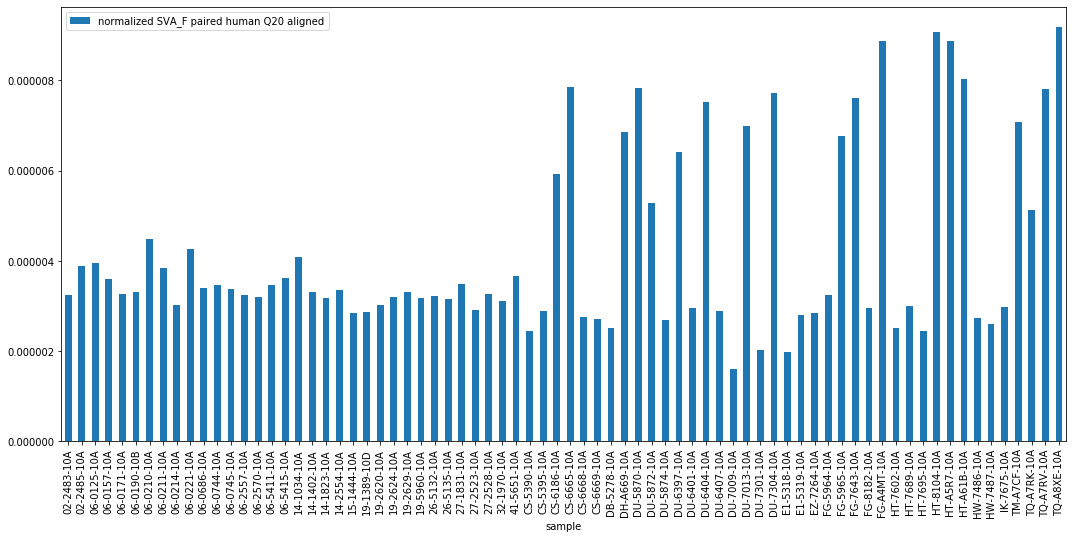

In [72]:
normal.plot(x='sample',y='normalized SVA_F paired human Q20 aligned',kind='bar')

In [73]:
normal.head()

,sample,raw pair count,HERVK113 unpaired reads aligned,HERVK113 unpaired human Q00 aligned,HERVK113 unpaired human Q10 aligned,HERVK113 unpaired human Q20 aligned,HERVK113 paired reads aligned,HERVK113 paired human Q00 aligned,HERVK113 paired human Q10 aligned,HERVK113 paired human Q20 aligned,...,gender,disease_type,center_name,normalized HERVK113 paired human Q20 aligned,normalized SVA_A paired human Q20 aligned,normalized SVA_B paired human Q20 aligned,normalized SVA_C paired human Q20 aligned,normalized SVA_D paired human Q20 aligned,normalized SVA_E paired human Q20 aligned,normalized SVA_F paired human Q20 aligned
1,02-2483-10A,579304076,4735,4646,2687,2673,3338,1474,1333,1308,...,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,0.000002,0.000008,0.000007,0.000007,0.000007,0.000007,0.000003
3,02-2485-10A,478851061,3895,3849,2229,2221,2564,1162,1073,1061,...,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,0.000002,0.000009,0.000008,0.000008,0.000008,0.000008,0.000004
6,06-0125-10A,695377506,5184,5103,2905,2892,3778,1643,1520,1494,...,female,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,0.000002,0.000009,0.000008,0.000008,0.000008,0.000008,0.000004
9,06-0157-10A,561676819,4434,4345,2471,2458,3040,1303,1195,1179,...,female,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,0.000002,0.000009,0.000008,0.000008,0.000008,0.000008,0.000004
12,06-0171-10A,721570484,5428,5302,3065,3048,3472,1440,1322,1306,...,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,0.000002,0.000008,0.000007,0.000007,0.000007,0.000007,0.000003


In [74]:
#groups = normal.groupby('center_name')
#fig, ax = plt.subplots()
#plt.xticks(rotation=90)
#for name, group in groups:
#    ax.bar(group['sample'],group['normalized HERVK113 paired human Q20 aligned'], label=name)
#ax.legend()


In [75]:
merged[merged['subject']=='CS-4941']

,sample,raw pair count,HERVK113 unpaired reads aligned,HERVK113 unpaired human Q00 aligned,HERVK113 unpaired human Q10 aligned,HERVK113 unpaired human Q20 aligned,HERVK113 paired reads aligned,HERVK113 paired human Q00 aligned,HERVK113 paired human Q10 aligned,HERVK113 paired human Q20 aligned,...,SVA_F paired reads aligned,SVA_F paired human Q00 aligned,SVA_F paired human Q10 aligned,SVA_F paired human Q20 aligned,subject,submitter,days_to_death,gender,disease_type,center_name
80,CS-4941-01A,258889928,246,246,68,68,212,98,93,93,...,350,140,114,114,CS-4941,CS-4941,234.0,male,Brain Lower Grade Glioma,Harvard Medical School
81,CS-4941-10A,282839817,282,280,63,63,296,125,114,114,...,466,179,141,138,CS-4941,CS-4941,234.0,male,Brain Lower Grade Glioma,Harvard Medical School


In [76]:
merged[merged['subject']=='06-0125']

,sample,raw pair count,HERVK113 unpaired reads aligned,HERVK113 unpaired human Q00 aligned,HERVK113 unpaired human Q10 aligned,HERVK113 unpaired human Q20 aligned,HERVK113 paired reads aligned,HERVK113 paired human Q00 aligned,HERVK113 paired human Q10 aligned,HERVK113 paired human Q20 aligned,...,SVA_F paired reads aligned,SVA_F paired human Q00 aligned,SVA_F paired human Q10 aligned,SVA_F paired human Q20 aligned,subject,submitter,days_to_death,gender,disease_type,center_name
4,06-0125-01A,1066268796,8464,8384,4874,4853,5920,2720,2538,2514,...,17454,6553,5567,5507,06-0125,06-0125,1448.0,female,Glioblastoma Multiforme,Broad Institute of MIT and Harvard
5,06-0125-02A,1083260581,8642,8580,4943,4920,6296,2888,2702,2662,...,15702,5903,4931,4864,06-0125,06-0125,1448.0,female,Glioblastoma Multiforme,Broad Institute of MIT and Harvard
6,06-0125-10A,695377506,5184,5103,2905,2892,3778,1643,1520,1494,...,9524,3309,2785,2748,06-0125,06-0125,1448.0,female,Glioblastoma Multiforme,Broad Institute of MIT and Harvard


In [77]:
#normal.plot(x='sample',y=['normalized HERVK113 paired human Q00 aligned',
#                          'normalized HERVK113 paired human Q10 aligned',
#                          'normalized HERVK113 paired human Q20 aligned'],
#            kind='bar')


In [78]:
#tumor.plot(x='sample',y=['normalized HERVK113 paired human Q00 aligned',
#                          'normalized HERVK113 paired human Q10 aligned',
#                          'normalized HERVK113 paired human Q20 aligned'],
#            kind='bar')


In [79]:
plt.rcParams["figure.figsize"] = [18.0,15.0]

In [80]:
#ax=tn.plot(marker='o',linestyle='',x='subject',y='normalized HERVK113 paired human Q20 aligned_normal')
#tn.plot(marker='o',linestyle='',x='subject',y='normalized HERVK113 paired human Q20 aligned_tumor',ax=ax)
#tn.plot(marker='o',linestyle='',x='subject',y='normalized HERVK113 paired human Q20 aligned_normal',ax=ax)
#tn.plot(marker='o',linestyle='',x='subject',y='normalized HERVK113 paired human Q20 aligned_tumor',ax=ax)
#plt.xticks(rotation=90)


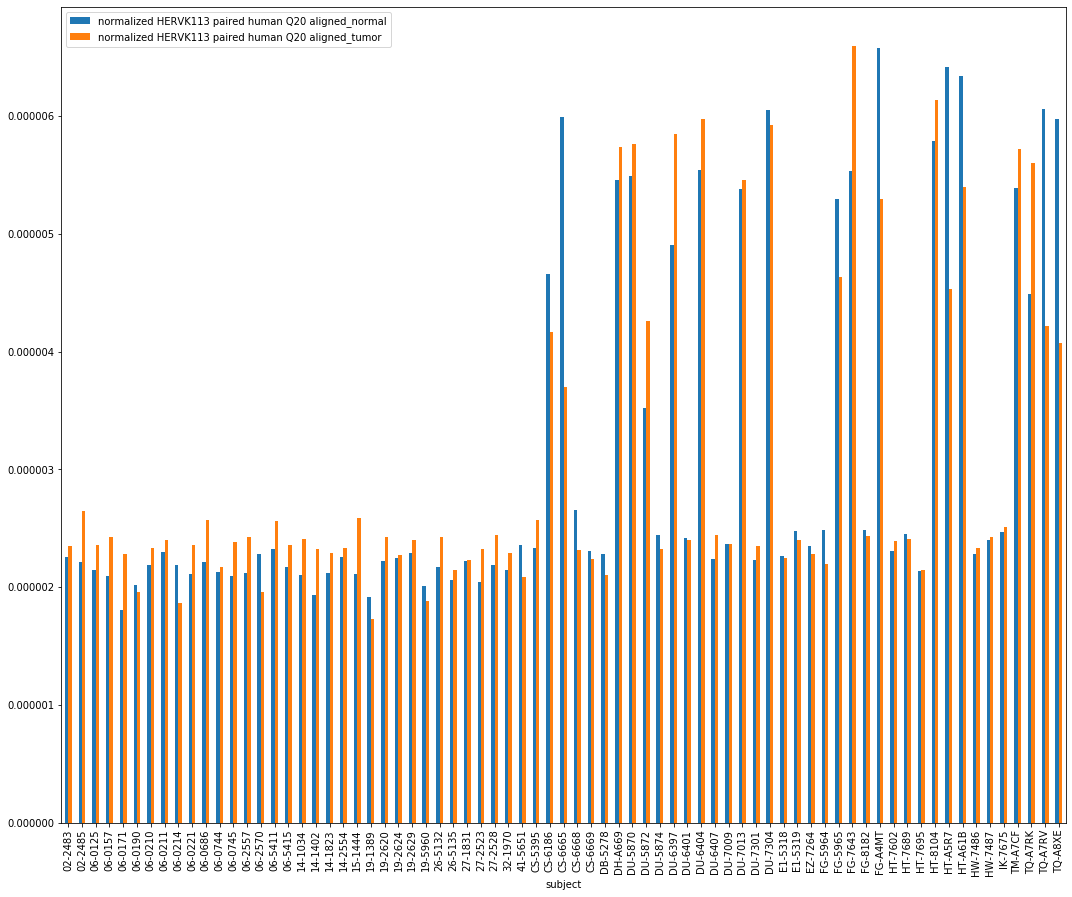

In [81]:
tn.plot(x='subject',y=['normalized HERVK113 paired human Q20 aligned_normal',
                          'normalized HERVK113 paired human Q20 aligned_tumor'],
            kind='bar')

In [82]:
df.shape

(147, 71)

In [83]:
df[df['normalized HERVK113 paired human Q20 aligned']>0.000003]['sample']

89     CS-6186-01A
91     CS-6186-10A
95     CS-6665-01A
96     CS-6665-10A
113    DH-A669-01A
115    DH-A669-10A
124    DU-5870-01A
126    DU-5870-10A
127    DU-5872-01A
131    DU-5872-10A
137    DU-6397-01A
139    DU-6397-10A
148    DU-6404-01A
151    DU-6404-10A
172    DU-7013-01A
173    DU-7013-10A
184    DU-7304-01A
186    DU-7304-10A
203    FG-5965-01B
206    FG-5965-10A
219    FG-7643-01A
220    FG-7643-10A
223    FG-A4MT-01A
225    FG-A4MT-10A
250    HT-8104-01A
251    HT-8104-10A
252    HT-A5R7-01A
253    HT-A5R7-10A
254    HT-A61B-01A
255    HT-A61B-10A
266    TM-A7CF-01A
268    TM-A7CF-10A
269    TQ-A7RK-01A
272    TQ-A7RK-10A
273    TQ-A7RV-01A
275    TQ-A7RV-10A
276    TQ-A8XE-01A
278    TQ-A8XE-10A
Name: sample, dtype: object

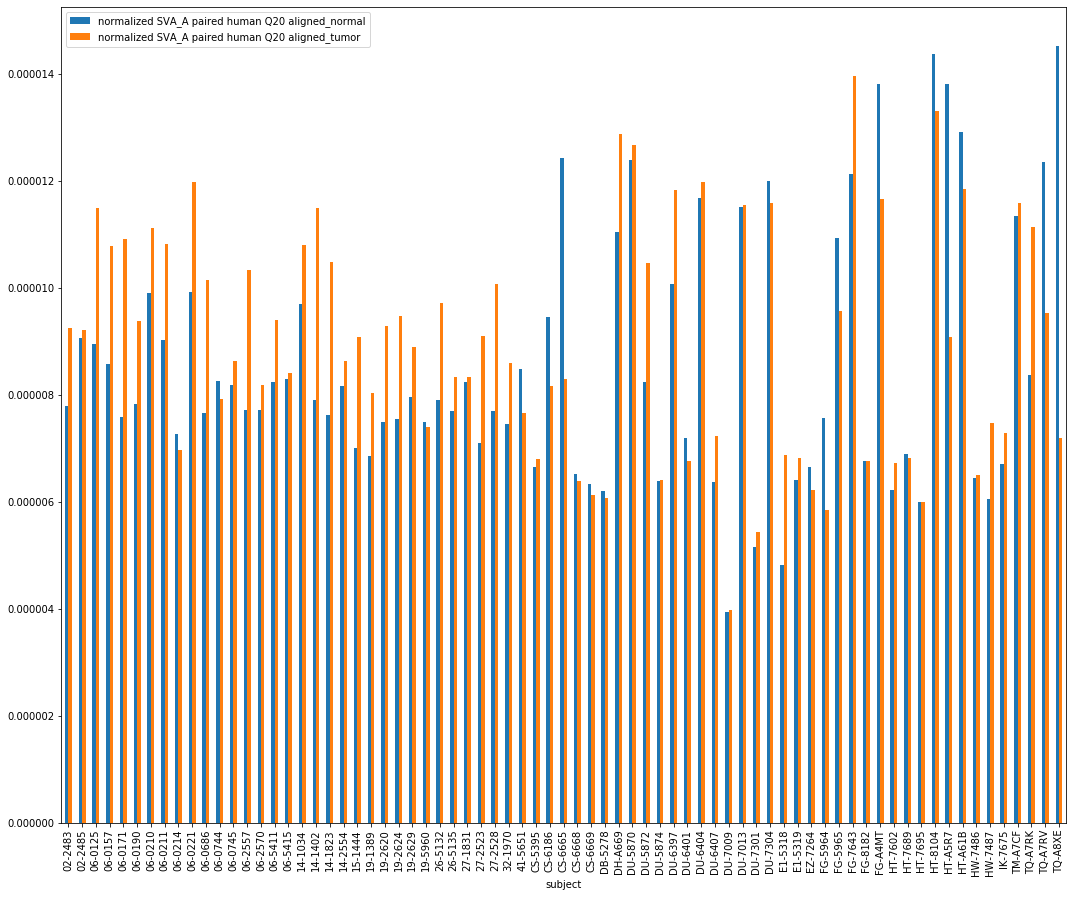

In [84]:
tn.plot(x='subject',y=['normalized SVA_A paired human Q20 aligned_normal',
                          'normalized SVA_A paired human Q20 aligned_tumor'],
            kind='bar')

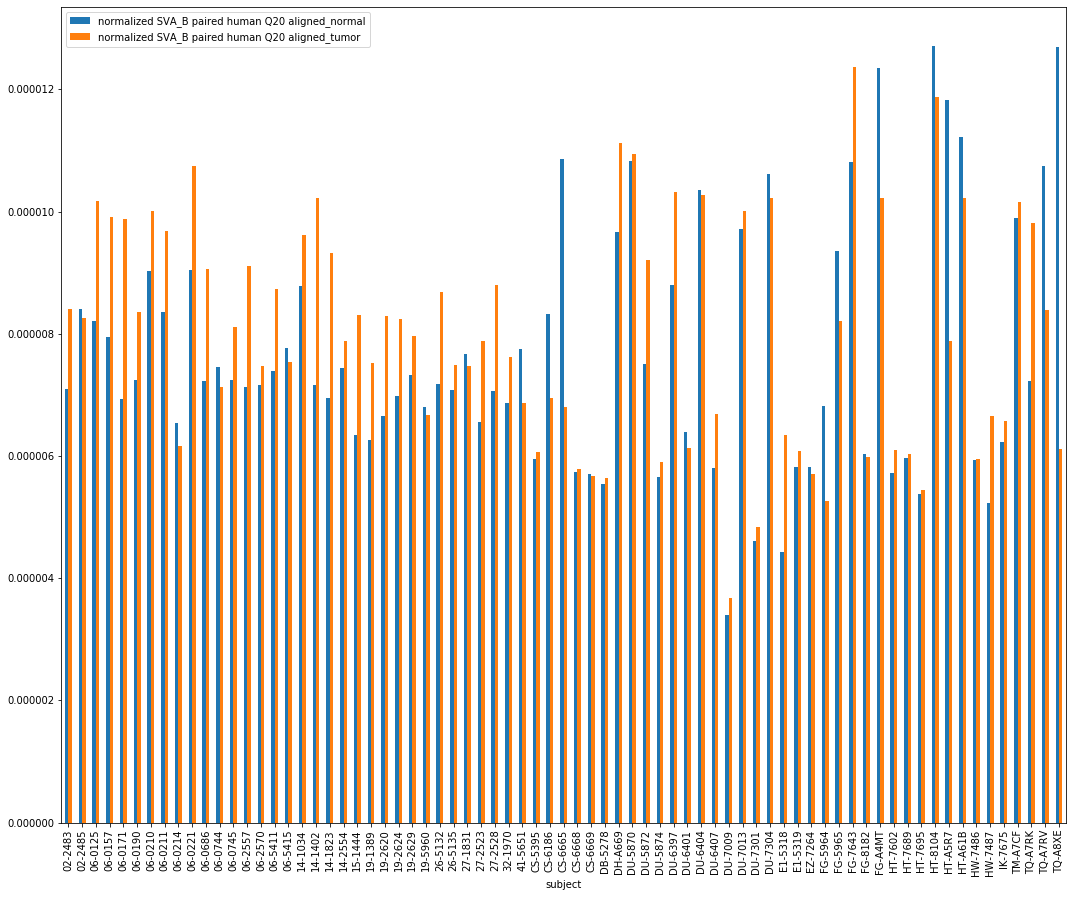

In [85]:
tn.plot(x='subject',y=['normalized SVA_B paired human Q20 aligned_normal',
                          'normalized SVA_B paired human Q20 aligned_tumor'],
            kind='bar')

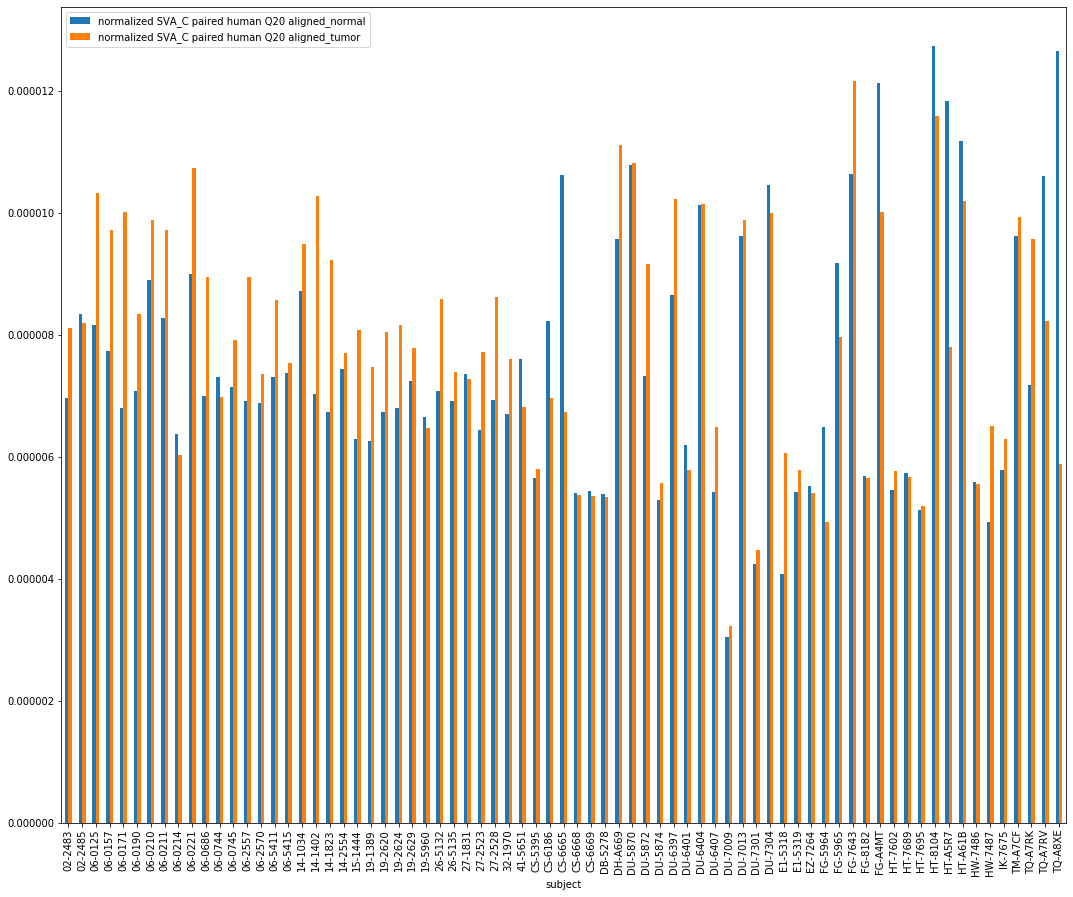

In [86]:
tn.plot(x='subject',y=['normalized SVA_C paired human Q20 aligned_normal',
                          'normalized SVA_C paired human Q20 aligned_tumor'],
            kind='bar')

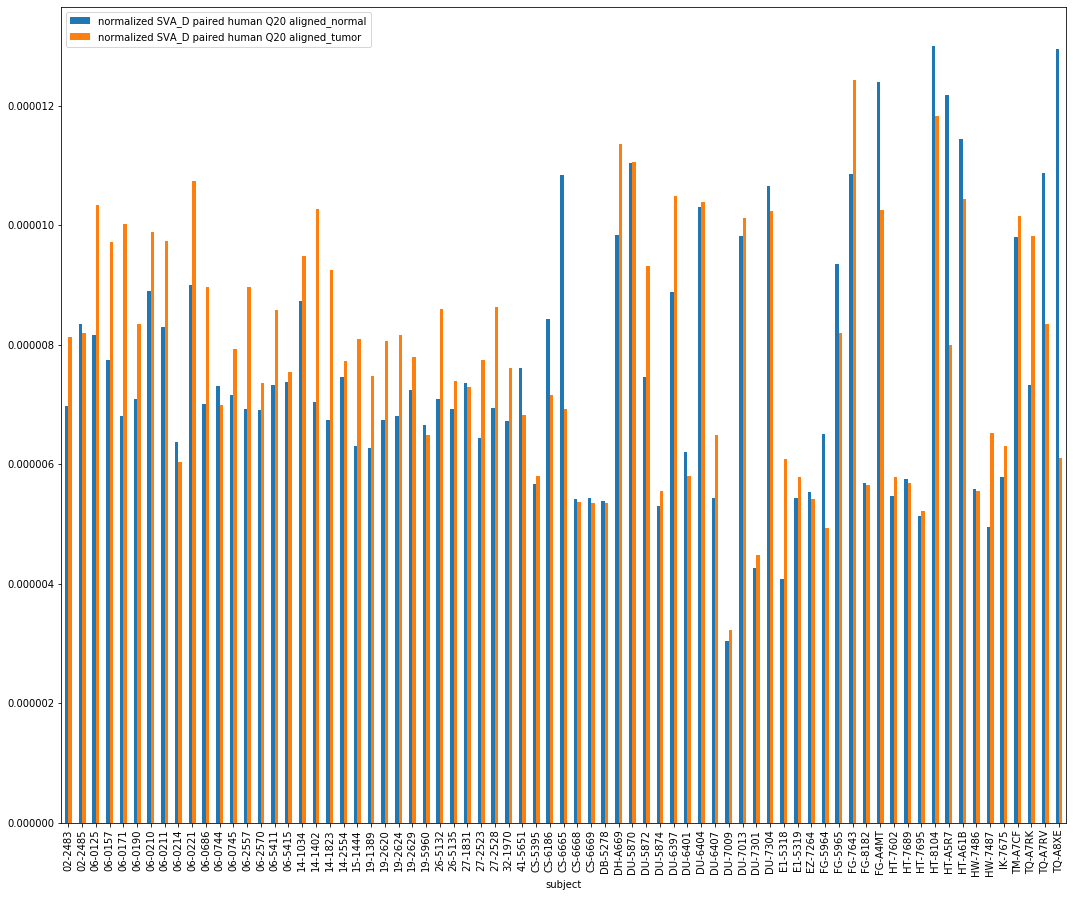

In [87]:
tn.plot(x='subject',y=['normalized SVA_D paired human Q20 aligned_normal',
                          'normalized SVA_D paired human Q20 aligned_tumor'],
            kind='bar')

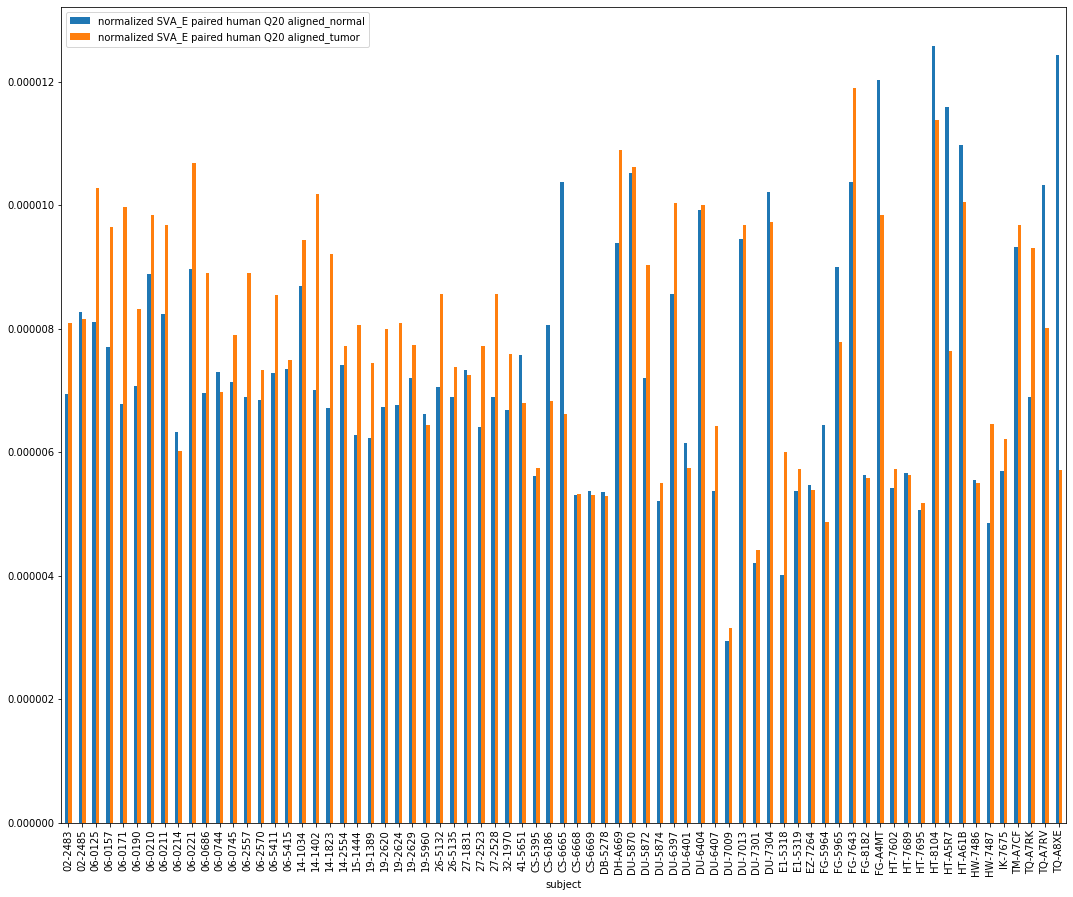

In [88]:
tn.plot(x='subject',y=['normalized SVA_E paired human Q20 aligned_normal',
                          'normalized SVA_E paired human Q20 aligned_tumor'],
            kind='bar')

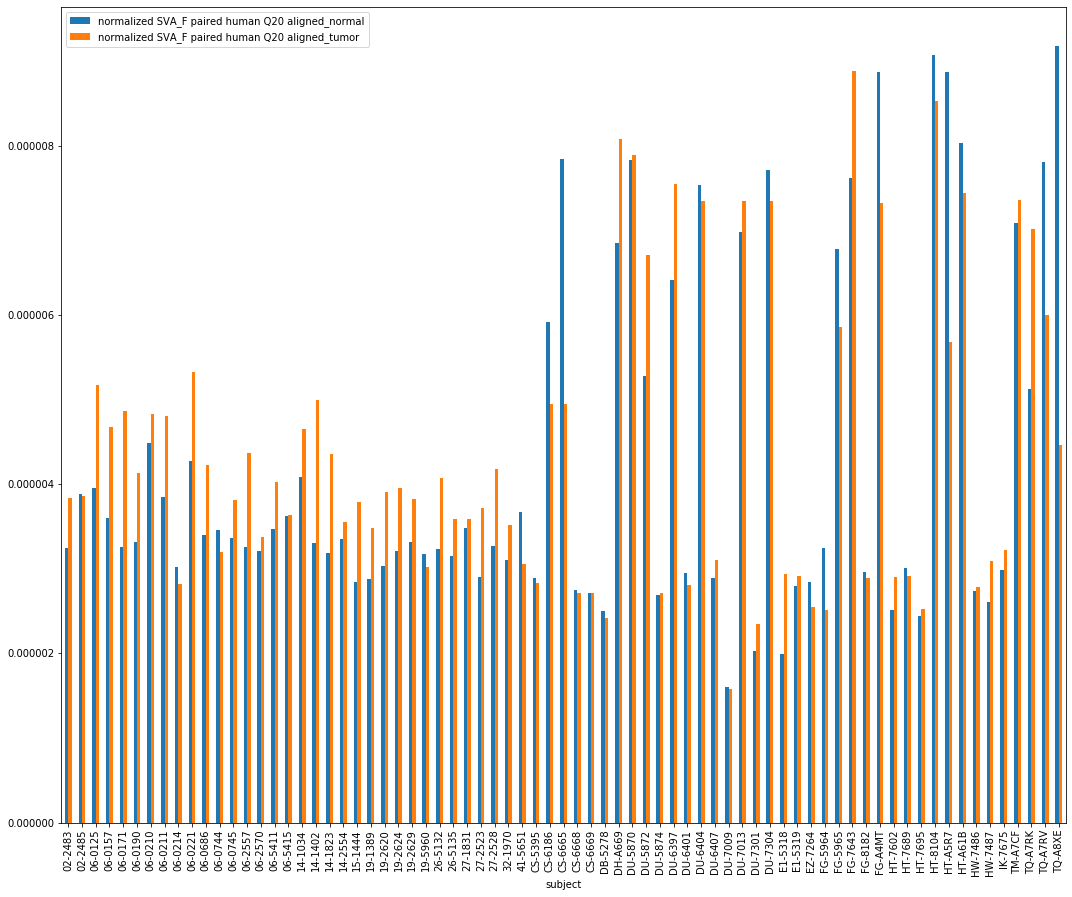

In [89]:
tn.plot(x='subject',y=['normalized SVA_F paired human Q20 aligned_normal',
                          'normalized SVA_F paired human Q20 aligned_tumor'],
            kind='bar')